Latar Belakang

obesitas menjadi krusial karena meningkatnya karena tidak hanya mengancam kesehatan individu tetapi juga membebani sistem kesehatan masyarakat. Obesitas dikaitkan dengan risiko tinggi penyakit kronis seperti diabetes, penyakit jantung, dan kanker, serta dipengaruhi oleh interaksi kompleks antara faktor genetik, lingkungan, pola makan, gaya hidup

Dataset ini berisi informasi tentang berbagai faktor yang dapat mempengaruhi tingkat obesitas seseorang. Setiap baris data mencakup karakteristik individu, seperti usia, jenis kelamin, tinggi badan, berat badan, serta kebiasaan makan dan gaya hidup mereka.

dataset ini dapat digunakan untuk membangun model machine learning guna memprediksi tingkat obesitas berdasarkan faktor-faktor yang tersedia. Model ini dapat membantu dalam pencegahan obesitas dan memberikan rekomendasi untuk gaya hidup yang lebih sehat.

Dalam final project ini, saya akan menggunakan teknik machine learning, seperti K-Nearest Neighbors, Random Forest, dan AdaBoost, untuk memprediksi tingkat obesitas berdasarkan pola makan, kebiasaan aktivitas fisik, dan faktor gaya hidup lainnya.

Objektif

Final Project ini bertujuan untuk membangun model klasifikasi yang dapat memprediksi tingkat obesitas seseorang berdasarkan faktor-faktor gaya hidup, pola makan, dan aktivitas fisik. Adapun tujuan utama yang ingin dicapai dalam proyek ini adalah:

Mampu memahami konsep klasifikasi dalam machine learning

Memahami bagaimana algoritma klasifikasi bekerja untuk memprediksi kategori tingkat obesitas.
Mampu mempersiapkan data untuk digunakan dalam model klasifikasi

Melakukan pembersihan data, penanganan nilai kosong, transformasi variabel, serta normalisasi atau standarisasi jika diperlukan.
Mampu mengimplementasikan algoritma klasifikasi untuk memprediksi tingkat obesitas

Menggunakan teknik seperti KNN, Random Forest, atau AdaBoostClassifier untuk mengembangkan model prediksi.
Mengevaluasi model menggunakan metrik seperti akurasi, precision, recall, dan F1-score.
Dengan proyek ini, diharapkan dapat diperoleh pemahaman yang lebih mendalam tentang bagaimana faktor-faktor tertentu mempengaruhi obesitas serta bagaimana machine learning dapat digunakan untuk melakukan klasifikasi tingkat obesitas secara efektif.

In [3]:
# import library preprocessing dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


Column Descriptions:
Gender – Male or Female.
Age – The person’s age in years.
Height – Height in meters.
Weight – Weight in kilograms.
family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).
FAVC – If the person frequently consumes high-calorie foods (yes/no).
FCVC – Frequency of vegetable consumption (scale from 1 to 3).
NCP – Number of main meals per day.
CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).
SMOKE – Whether the person smokes (yes/no).
CH2O – Daily water intake (scale from 1 to 3).
SCC – If the person monitors their calorie intake (yes/no).
FAF – Physical activity frequency (scale from 0 to 3).
TUE – Time spent using technology (scale from 0 to 3).
CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).
MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).
NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

In [6]:
#Data Data Preprocessing
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [7]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int64  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [11]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.356493,1.702616,86.858706,2.421409,2.701203,2.004792,1.012827,0.663031
std,6.379977,0.093251,26.190838,0.534807,0.764655,0.608281,0.853496,0.608152
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,66.000000,2.000000,2.700000,1.590000,0.125000,0.000000
50%,23.000000,1.700000,83.100000,2.400000,3.000000,2.000000,1.000000,0.631000
75%,26.000000,1.770000,108.015000,3.000000,3.000000,2.465000,1.680000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


C:\Users\Asus\AppData\Local\Temp\ipykernel_18424\121375001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="NObeyesdad", data=df, palette="viridis")


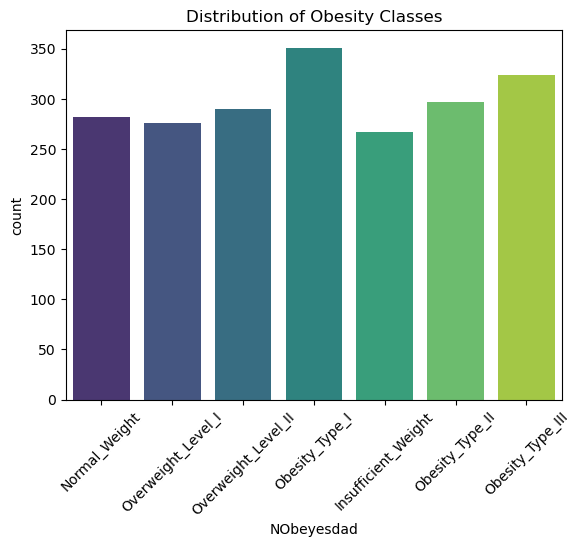

In [12]:
#Check Class Distribution (Target Variable: NObeyesdad)
sns.countplot(x="NObeyesdad", data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Classes")
plt.show()

In [13]:
df_baru = df.copy()

In [14]:
from sklearn.preprocessing import LabelEncoder
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom kategori yang akan diencode
categorical_cols = ["Gender", "family_history_with_overweight", "FAVC", "SCC",
                    "CAEC", "SMOKE", "CALC", "MTRANS", "NObeyesdad"]

# Loop untuk encoding setiap kolom kategori
for col in categorical_cols:
    if col in df_baru.columns:
        df_baru[col] = label_encoder.fit_transform(df_baru[col])
    else:
        print(f"Kolom '{col}' tidak ditemukan dalam DataFrame!")

# Cek hasil encoding
print(df_baru.head())

   Gender  Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0   21    1.62    64.0                               1     0   2.0   
1       0   21    1.52    56.0                               1     0   3.0   
2       1   23    1.80    77.0                               1     0   2.0   
3       1   27    1.80    87.0                               0     0   3.0   
4       1   22    1.78    89.8                               0     0   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0     2      0   2.0    0  0.0  1.0     3       3           1  
1  3.0     2      1   3.0    1  3.0  0.0     2       3           1  
2  3.0     2      0   2.0    0  2.0  1.0     1       3           1  
3  3.0     2      0   2.0    0  2.0  0.0     1       4           5  
4  1.0     2      0   2.0    0  0.0  0.0     2       3           6  


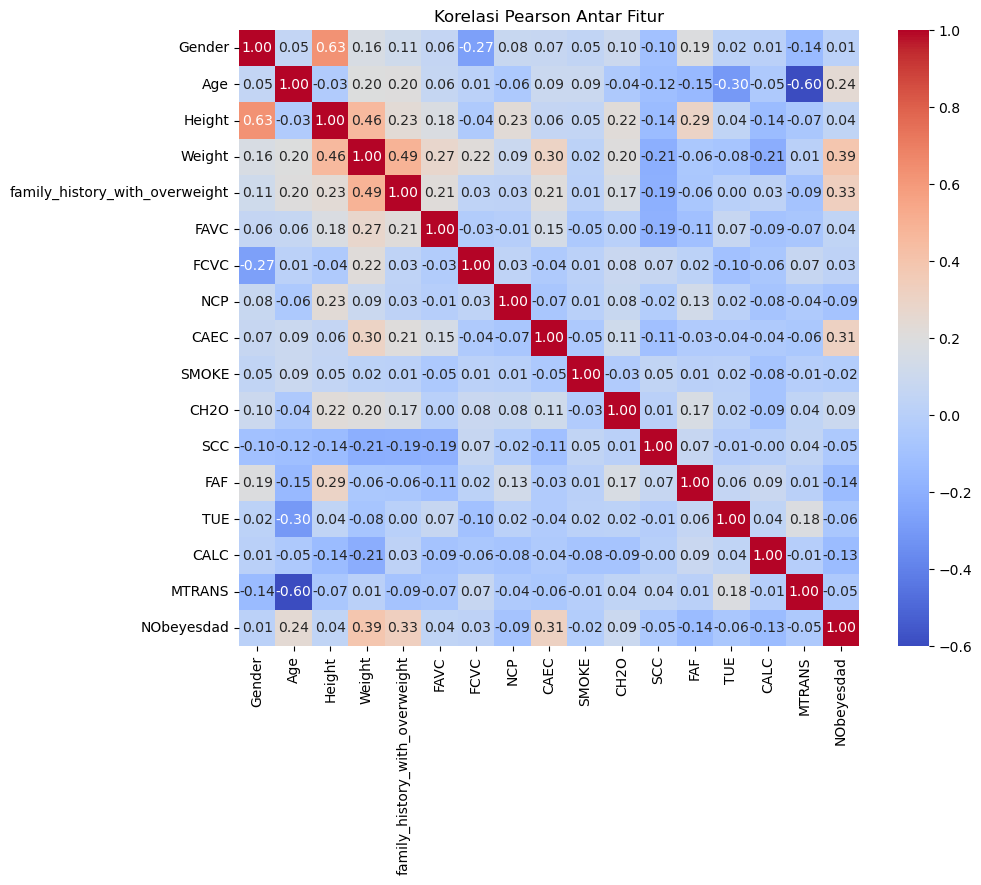

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_baru.corr(),annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Pearson Antar Fitur")
plt.show()

Matriks korelasi antar variabel yang disajikan pada Gambar menunjukkan nilai korelasi berkisar antara -1 hingga 1, yang mengindikasikan kekuatan dan arah hubungan antara dua variabel ( Iparraguirre-Villanueva, 2024).
Korelasi Kuat

🔹 Tinggi & Gender (0.63)
Menunjukkan bahwa tinggi badan berkorelasi kuat dengan gender, kemungkinan karena laki-laki cenderung lebih tinggi daripada perempuan.

🔹 Berat & Tinggi (0.46)
Korelasi positif ini menunjukkan bahwa individu yang lebih tinggi cenderung memiliki berat badan lebih besar.

🔹 Berat & Riwayat Keluarga dengan Obesitas (0.49)
Orang yang memiliki riwayat keluarga dengan obesitas cenderung memiliki berat badan lebih tinggi, yang selaras dengan faktor genetik atau gaya hidup.

🔹 NObeyesdad (Label Obesitas) & Berat (0.39)
Korelasi positif sedang menunjukkan bahwa berat badan merupakan faktor penting dalam klasifikasi obesitas.

🔹 NObeyesdad & Riwayat Keluarga dengan Obesitas (0.33)
Menunjukkan bahwa obesitas lebih umum terjadi pada individu dengan riwayat keluarga yang mengalami obesitas.

In [16]:
df_baru["NObeyesdad"].value_counts()

NObeyesdad
2    351
4    324
3    297
6    290
1    282
5    276
0    267
Name: count, dtype: int64

In [17]:
df_baru.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [18]:
#mengecek outlier
df_outlier = df_baru[["Age", "Weight", "CH2O", "FAF", "TUE", "NObeyesdad"]]

Berat Badan, Usia, FAF, CH2O, dan TUE sering dikelompokkan bersama dalam dataset terkait kesehatan (Alzayed, 2020)
Fitur-fitur ini bersama-sama menggambarkan keseimbangan energi (kalori masuk vs. kalori keluar) dan pilihan gaya hidup:

Faktor Input: Usia (dasar biologis), FAF (olahraga), TUE (kurang gerak), dan CH2O (kebiasaan diet).

Output: Berat badan atau risiko obesitas.

Mereka sering digunakan dalam dataset seperti UCI Obesity Risk Prediction, yang bertujuan memahami interaksi antara gaya hidup, demografi, dan hasil kesehatan. Dengan menggabungkan variabel ini, model dapat mengidentifikasi faktor multifaset yang memengaruhi manajemen berat badan, menjadikannya penting dalam analisis prediktif untuk kesehatan masyarakat.

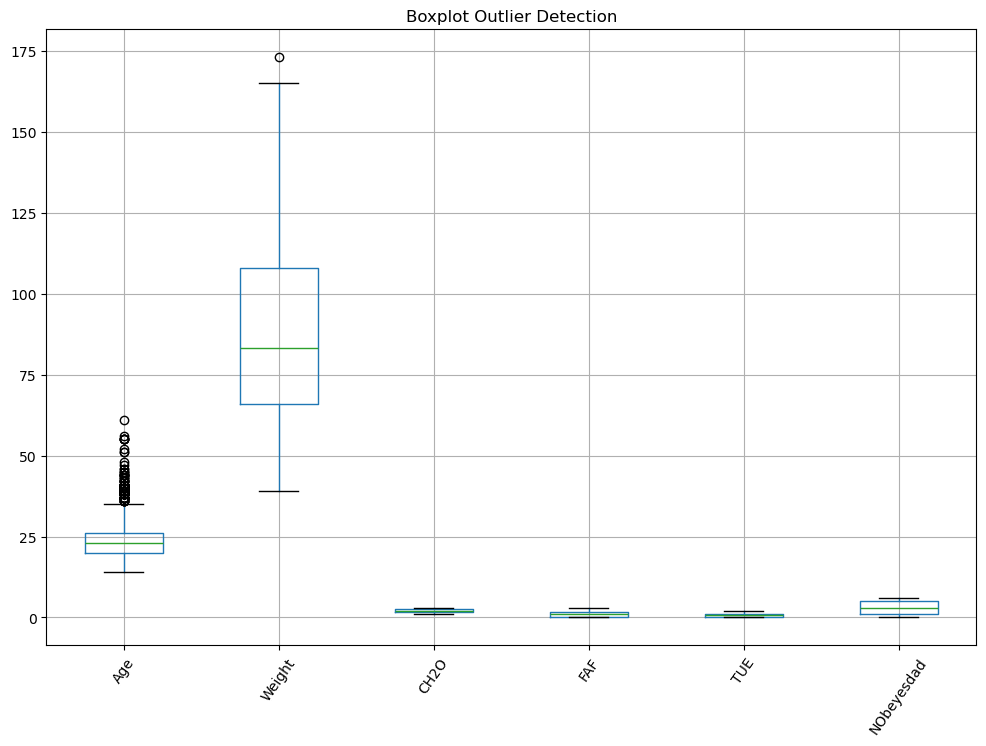

In [19]:
#mengecek outlier
#membuat boxplot outlier
plt.figure(figsize=(12,8))
df_outlier.boxplot()
plt.title("Boxplot Outlier Detection")
plt.xticks(rotation=55)
plt.show()

In [21]:
#hilangkan outlier
def hapus_outlier(data):
    df_bersih = data.copy() #melakukan copy data kedalam variabel df_bersih
    for col in df_bersih.columns: #memanggil nama setiap kolom yang disimpan ke dalam variabel col untuk diproses
    #col=pm2.5
        Q1 = data[col].quantile(0.25) #untuk menghitung Q1
        Q3 = data[col].quantile(0.75) #untuk menghitung Q3
        IQR = Q3-Q1 #untuk menhitung IQR range antara Q3 dan Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q3 - 1.5 * IQR
        df_bersih = df_bersih [(df_bersih[col] > lower_bound)&(df_bersih[col]<upper_bound)]
    return df_bersih

In [22]:
df_no_outlier = hapus_outlier(df_outlier) #run hapus outlier

In [23]:
print("Jumlah data sebelum menghapus outlier:", df.shape[0])
print("Jumlah data setelah menghapus outlier:", df_no_outlier.shape[0])

Jumlah data sebelum menghapus outlier: 2087
Jumlah data setelah menghapus outlier: 1508


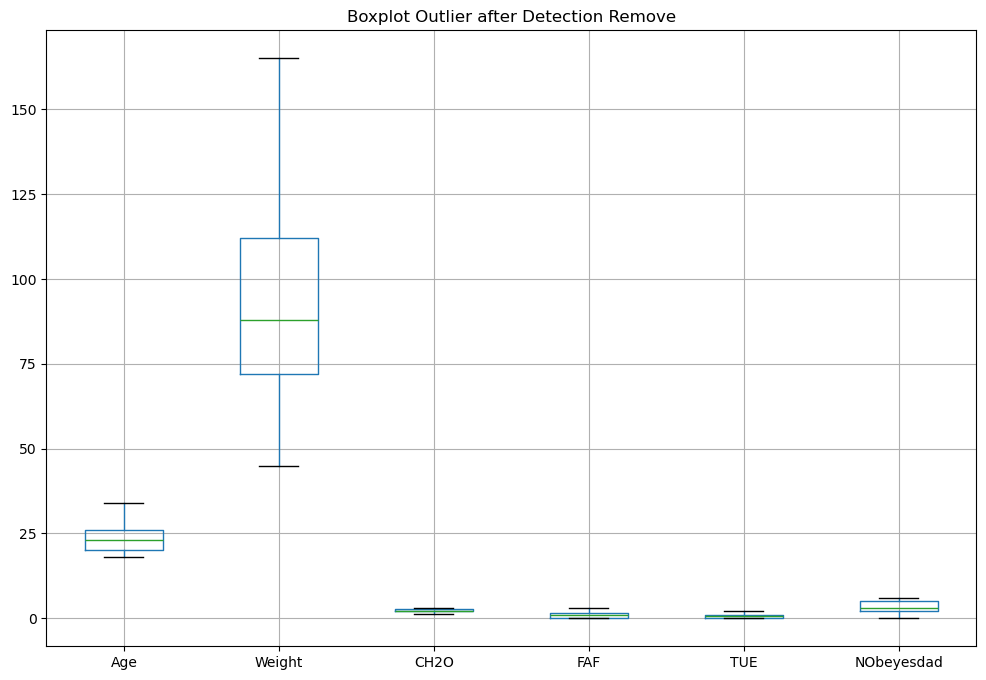

In [24]:
plt.figure(figsize=(12,8))
df_no_outlier[["Age", "Weight", "CH2O", "FAF", "TUE", "NObeyesdad"]].boxplot()
plt.title("Boxplot Outlier after Detection Remove")
plt.show()

In [25]:
print(df_outlier.shape)
print(df_no_outlier.shape)

(2087, 6)
(1508, 6)


In [26]:
#Split Data
from sklearn.model_selection import train_test_split
X = df_no_outlier.drop(["NObeyesdad"], axis=1)
y = df_no_outlier["NObeyesdad"]
# Enkoding target variable
y_encoded = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


Hasil performa untuk rasio test size 0.2:


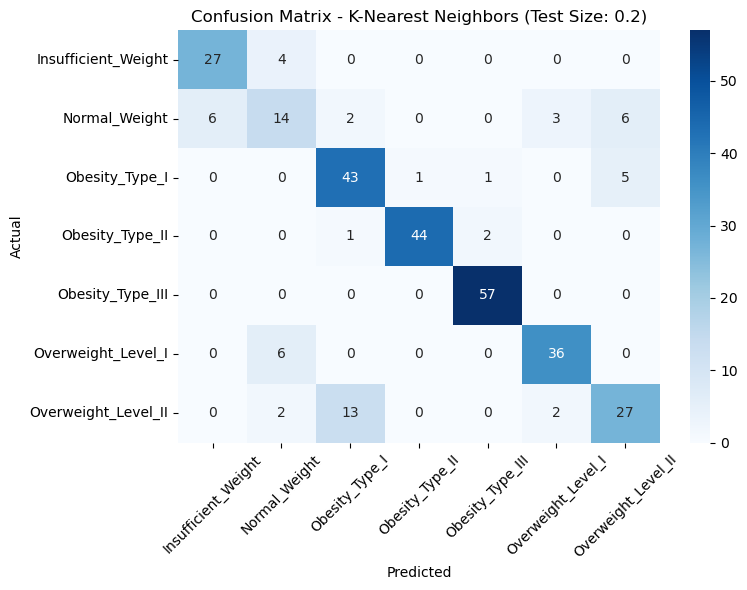


Model: K-Nearest Neighbors
Akurasi Training: 88.47%
Akurasi Testing: 82.12%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.87      0.84        31
      Normal_Weight       0.54      0.45      0.49        31
     Obesity_Type_I       0.73      0.86      0.79        50
    Obesity_Type_II       0.98      0.94      0.96        47
   Obesity_Type_III       0.95      1.00      0.97        57
 Overweight_Level_I       0.88      0.86      0.87        42
Overweight_Level_II       0.71      0.61      0.66        44

           accuracy                           0.82       302
          macro avg       0.80      0.80      0.80       302
       weighted avg       0.82      0.82      0.82       302

--------------------------------------------------


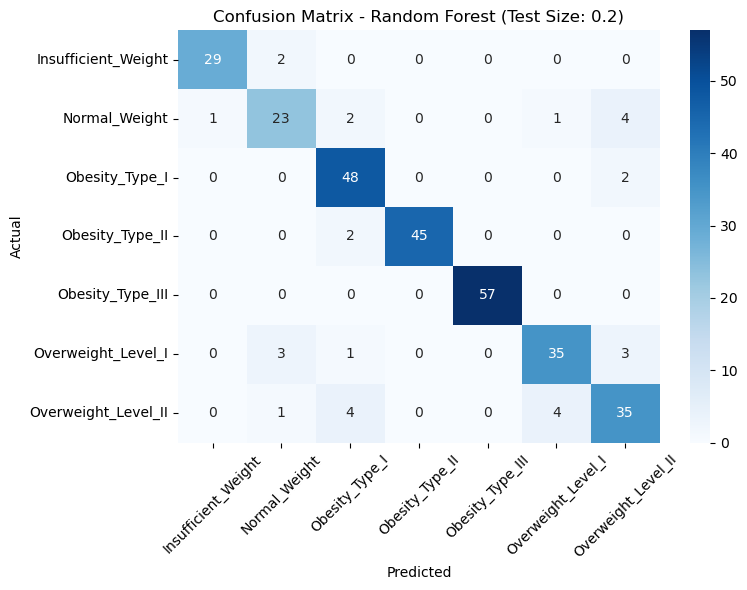


Model: Random Forest
Akurasi Training: 99.92%
Akurasi Testing: 90.07%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.94      0.95        31
      Normal_Weight       0.79      0.74      0.77        31
     Obesity_Type_I       0.84      0.96      0.90        50
    Obesity_Type_II       1.00      0.96      0.98        47
   Obesity_Type_III       1.00      1.00      1.00        57
 Overweight_Level_I       0.88      0.83      0.85        42
Overweight_Level_II       0.80      0.80      0.80        44

           accuracy                           0.90       302
          macro avg       0.90      0.89      0.89       302
       weighted avg       0.90      0.90      0.90       302

--------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision

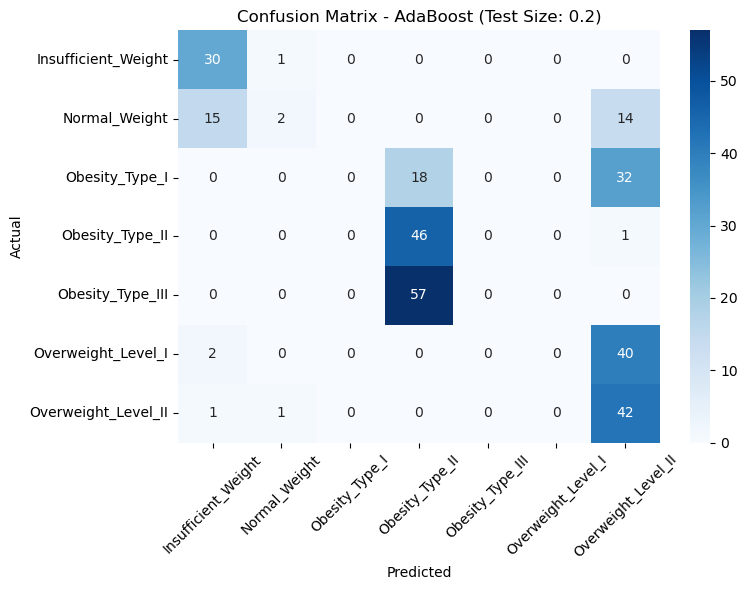


Model: AdaBoost
Akurasi Training: 38.14%
Akurasi Testing: 39.74%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.62      0.97      0.76        31
      Normal_Weight       0.50      0.06      0.11        31
     Obesity_Type_I       0.00      0.00      0.00        50
    Obesity_Type_II       0.38      0.98      0.55        47
   Obesity_Type_III       0.00      0.00      0.00        57
 Overweight_Level_I       0.00      0.00      0.00        42
Overweight_Level_II       0.33      0.95      0.49        44

           accuracy                           0.40       302
          macro avg       0.26      0.42      0.27       302
       weighted avg       0.22      0.40      0.25       302

--------------------------------------------------

Hasil performa untuk rasio test size 0.3:


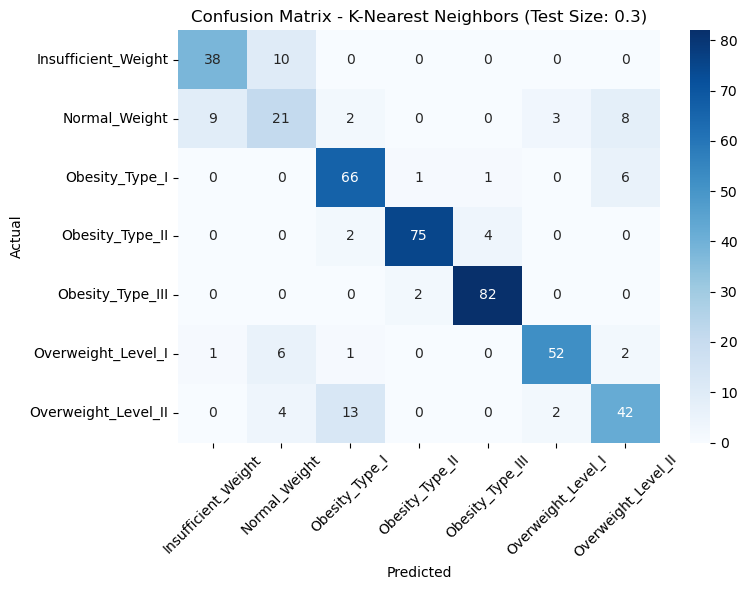


Model: K-Nearest Neighbors
Akurasi Training: 87.77%
Akurasi Testing: 83.00%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.79      0.79        48
      Normal_Weight       0.51      0.49      0.50        43
     Obesity_Type_I       0.79      0.89      0.84        74
    Obesity_Type_II       0.96      0.93      0.94        81
   Obesity_Type_III       0.94      0.98      0.96        84
 Overweight_Level_I       0.91      0.84      0.87        62
Overweight_Level_II       0.72      0.69      0.71        61

           accuracy                           0.83       453
          macro avg       0.80      0.80      0.80       453
       weighted avg       0.83      0.83      0.83       453

--------------------------------------------------


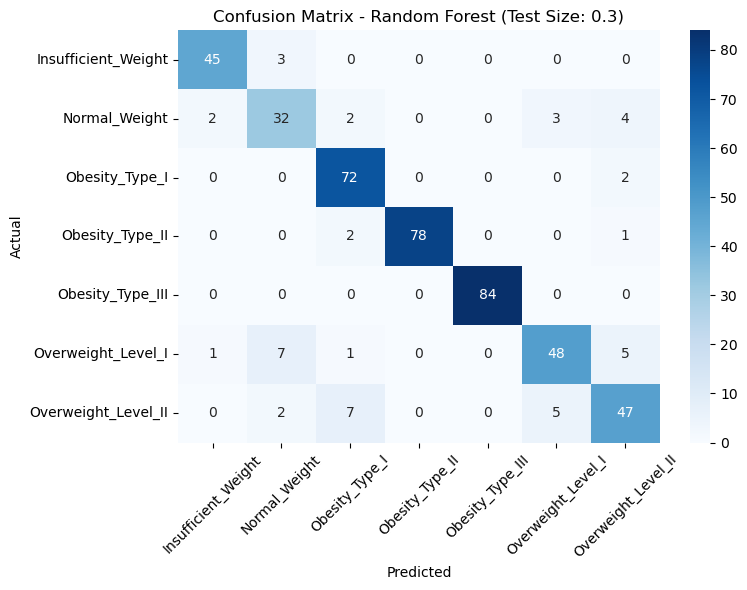


Model: Random Forest
Akurasi Training: 100.00%
Akurasi Testing: 89.62%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94        48
      Normal_Weight       0.73      0.74      0.74        43
     Obesity_Type_I       0.86      0.97      0.91        74
    Obesity_Type_II       1.00      0.96      0.98        81
   Obesity_Type_III       1.00      1.00      1.00        84
 Overweight_Level_I       0.86      0.77      0.81        62
Overweight_Level_II       0.80      0.77      0.78        61

           accuracy                           0.90       453
          macro avg       0.88      0.88      0.88       453
       weighted avg       0.90      0.90      0.90       453

--------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision

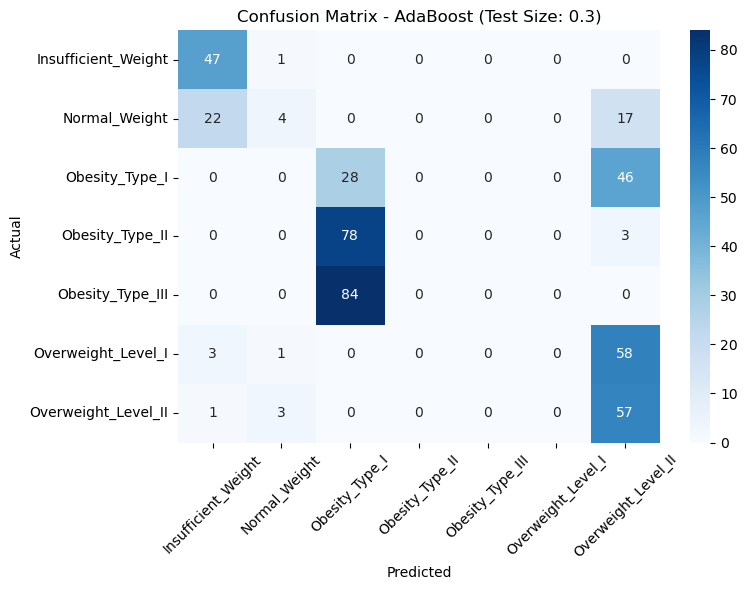


Model: AdaBoost
Akurasi Training: 29.48%
Akurasi Testing: 30.02%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.64      0.98      0.78        48
      Normal_Weight       0.44      0.09      0.15        43
     Obesity_Type_I       0.15      0.38      0.21        74
    Obesity_Type_II       0.00      0.00      0.00        81
   Obesity_Type_III       0.00      0.00      0.00        84
 Overweight_Level_I       0.00      0.00      0.00        62
Overweight_Level_II       0.31      0.93      0.47        61

           accuracy                           0.30       453
          macro avg       0.22      0.34      0.23       453
       weighted avg       0.18      0.30      0.20       453

--------------------------------------------------

Hasil performa untuk rasio test size 0.4:


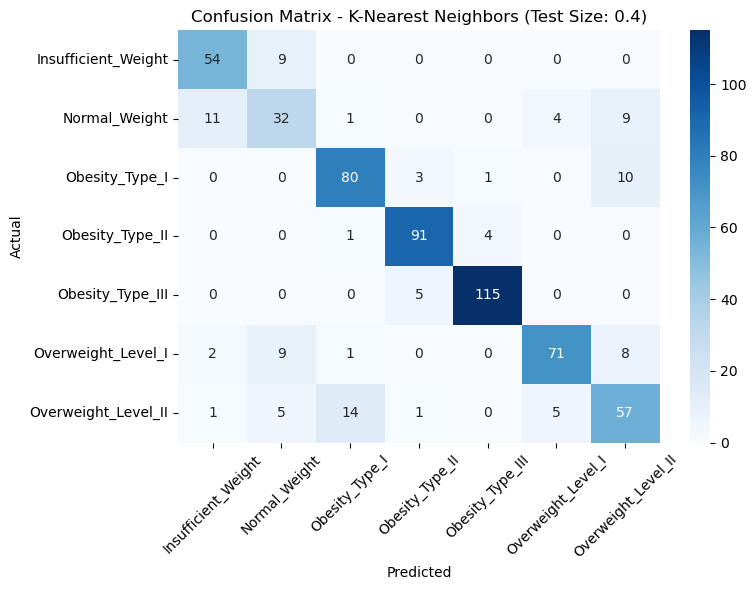


Model: K-Nearest Neighbors
Akurasi Training: 86.73%
Akurasi Testing: 82.78%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.86      0.82        63
      Normal_Weight       0.58      0.56      0.57        57
     Obesity_Type_I       0.82      0.85      0.84        94
    Obesity_Type_II       0.91      0.95      0.93        96
   Obesity_Type_III       0.96      0.96      0.96       120
 Overweight_Level_I       0.89      0.78      0.83        91
Overweight_Level_II       0.68      0.69      0.68        83

           accuracy                           0.83       604
          macro avg       0.81      0.81      0.80       604
       weighted avg       0.83      0.83      0.83       604

--------------------------------------------------


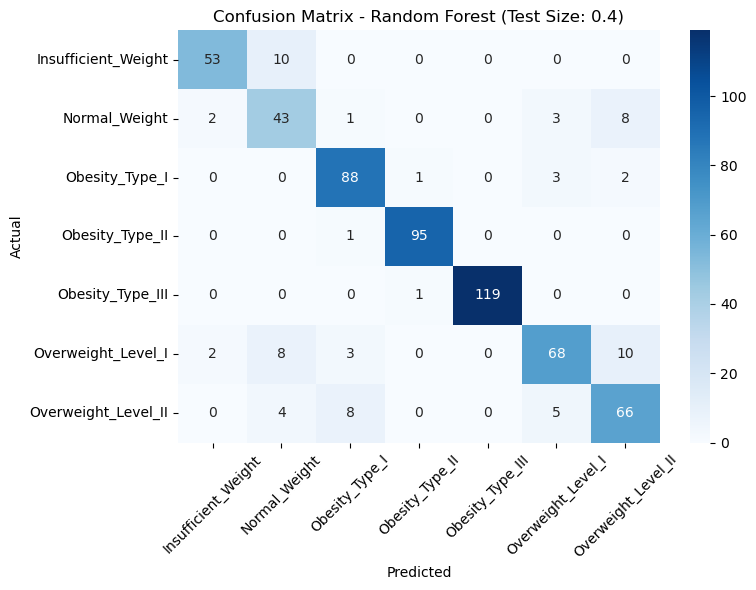


Model: Random Forest
Akurasi Training: 100.00%
Akurasi Testing: 88.08%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.84      0.88        63
      Normal_Weight       0.66      0.75      0.70        57
     Obesity_Type_I       0.87      0.94      0.90        94
    Obesity_Type_II       0.98      0.99      0.98        96
   Obesity_Type_III       1.00      0.99      1.00       120
 Overweight_Level_I       0.86      0.75      0.80        91
Overweight_Level_II       0.77      0.80      0.78        83

           accuracy                           0.88       604
          macro avg       0.87      0.87      0.86       604
       weighted avg       0.88      0.88      0.88       604

--------------------------------------------------


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision

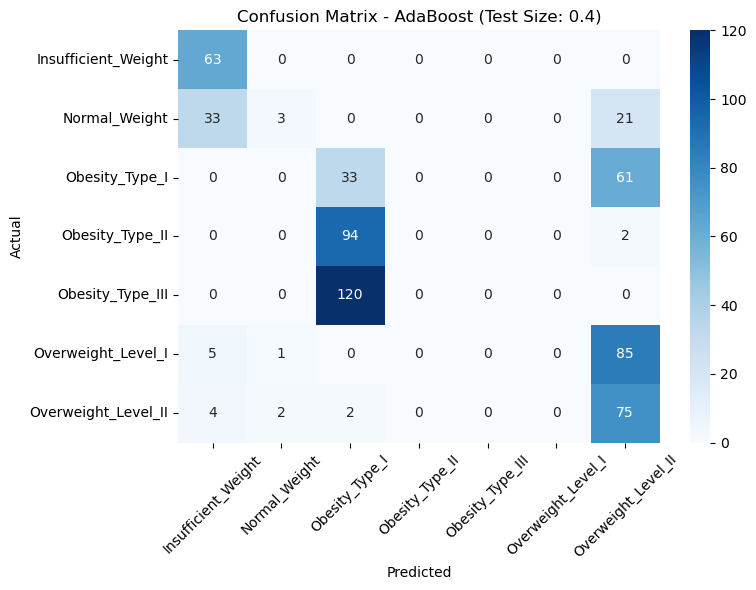


Model: AdaBoost
Akurasi Training: 29.09%
Akurasi Testing: 28.81%

Classification Report (Testing):
                     precision    recall  f1-score   support

Insufficient_Weight       0.60      1.00      0.75        63
      Normal_Weight       0.50      0.05      0.10        57
     Obesity_Type_I       0.13      0.35      0.19        94
    Obesity_Type_II       0.00      0.00      0.00        96
   Obesity_Type_III       0.00      0.00      0.00       120
 Overweight_Level_I       0.00      0.00      0.00        91
Overweight_Level_II       0.31      0.90      0.46        83

           accuracy                           0.29       604
          macro avg       0.22      0.33      0.21       604
       weighted avg       0.17      0.29      0.18       604

--------------------------------------------------


In [27]:
# List model
models = [
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

rasio = [0.2, 0.3, 0.4]  # Contoh rasio test size

for test_size in rasio:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=42
    )
    
    print(f"\n{'='*50}")
    print(f"Hasil performa untuk rasio test size {test_size}:")
    print("="*50)
    
    # Iterasi setiap model
    for name, model in models:
        # Training model
        model.fit(X_train, y_train)
        
        # Prediksi
        y_pred_test = model.predict(X_test)
        
        # Hitung akurasi
        train_acc = accuracy_score(y_train, model.predict(X_train)) * 100
        test_acc = accuracy_score(y_test, y_pred_test) * 100
        
        # Classification report
        report_test = classification_report(
            y_test, 
            y_pred_test,
            target_names=label_encoder.classes_
        )
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred_test)
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, 
                    annot=True, 
                    fmt='d', 
                    cmap='Blues', 
                    xticklabels=label_encoder.classes_, 
                    yticklabels=label_encoder.classes_)
        plt.title(f'Confusion Matrix - {name} (Test Size: {test_size})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Print hasil evaluasi
        print(f"\nModel: {name}")
        print(f"Akurasi Training: {train_acc:.2f}%")
        print(f"Akurasi Testing: {test_acc:.2f}%")
        print("\nClassification Report (Testing):")
        print(report_test)
        print("-"*50)
        plt.close()  # Tutup plot untuk hindari memory leak

Kesimpulan :
Variabel yang dipilih sebagai fitur dalam pembuatan model meliputi: 'Age' (usia), 'Height' (tinggi badan), 'Weight' (berat badan), 'FAF' (frekuensi aktivitas fisik), dan 'TUE' (waktu penggunaan gadget).

alam pengembangan model, dilakukan teknik oversampling dengan metode SMOTE untuk mengatasi ketidakseimbangan data pada kelas minoritas (misal: Normal_Weight). Pada proyek ini, tiga algoritma klasifikasi diuji: Random Forest, K-Nearest Neighbors (KNN), dan AdaBoost.

Random Forest adalah solusi optimal untuk klasifikasi tingkat obesitas, dengan akurasi tinggi (90.07%) dan kemampuan generalisasi yang baik. Meskipun AdaBoost gagal, penerapan teknik oversampling dan tuning hiperparameter dapat meningkatkan kinerjanya. Deployment aplikasi Streamlit menunjukkan potensi implementasi model ini dalam dunia nyata, khususnya di bidang kesehatan preventif.

Daftra Pustaka

Alzayed, A., & Al-Hunaiyyan, W. A. A. (2022). Diagnosis of Obesity Level Based On Bagging Ensemble Classifier And Feature Selection Methods. International Journal of Artificial Intelligence & Applications, 13(02), 37-54.

Iparraguirre-Villanueva, O., Mirano-Portilla, L., Gamarra-Mendoza, M., & Robles-Espiritu, W. (2023). Predicting obesity in nutritional patients using decision tree modeling.
